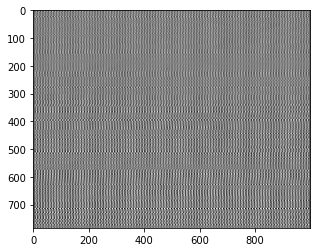

In [43]:
#desperat forsøk på implisitt 2d poisson
import numpy as np
import matplotlib.pyplot as plt
import imageio
import Eksplisitt as eks
import ImageView as imv
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
import Grayscale

file= '../hdr-bilder/Balls/Balls_00032.png'
u=Grayscale.grayscale(file)

N_punkter = u.shape[1]
N_tider = u.shape[0]
alpha = 5      #dt/dx**2



#lager diagonalmatrise
upper1= np.concatenate(([0, 0], -alpha * np.ones(N_punkter - 2)))
upper2= np.concatenate(([0, 0, 0], -alpha * np.ones(N_punkter - 3)))
center= np.concatenate(([1], (1 + 2 * alpha) * np.ones(N_punkter - 2),[1]))
lower1 = np.concatenate((-alpha * np.ones(N_punkter - 2), [0, 0]))
lower2 = np.concatenate((-alpha * np.ones(N_punkter - 3), [0, 0, 0]))
diags = np.array([upper2, upper1, center, lower1, lower2])
A=spdiags(diags, [2,1,0,-1,-2], N_punkter, N_punkter).tocsc()

for n in range(N_tider-1):
    u[n+1, :]=spsolve(A, u[n+1, :])
    
plt.imshow(u,plt.cm.gray)
